In [1]:
from sklearn.cluster import KMeans
import metrics
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from time import time
import numpy as np
import keras.backend as K
from keras.engine.topology import Layer, InputSpec
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
import metrics

Using TensorFlow backend.
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


In [4]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import collections
%matplotlib inline

In [5]:



def create_dataset(X, Y, **options):
    """Convert an array of X, Y values into a dataset matrix for and LSTM"""
    
    look_back = options.pop('look_back', None)
    dataX, dataY = [], []
    for i in range(len(X) - look_back):
        a = X[i:(i+look_back)]
        dataX.append(a)
        dataY.append(Y[i + look_back - 1])
    return np.array(dataX), np.array(dataY)

look_back = 100

In [6]:
path = glob.glob(r'C:\Keras_Deep_Clustering\VolvoData\VolvoData\2019\*.csv')

X_all = np.empty((1, 100, 38))
Y_all = np.empty((1,))

for i in range(1,5):
    print(path[i])
    
    Flow = pd.read_csv(path[i], usecols=['Lat','Long','PositionInLane','Velocity','PosLgt1'
                                              ,'PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLat1','PosLat2','PosLat3'
                                              ,'PosLat4','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLat1'
                                              ,'VelLat2','VelLat3','VelLat4','VelLat5','AccLgt1','AccLgt2','AccLgt3'
                                              ,'AccLgt4','AccLgt5','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5'
                                              ,'Angle1','Angle2','Angle3','Angle4','Angle5', 'Flow'])
    Flow.fillna(-1, inplace=True)
    

        
    Y_train = np.array(Flow['Flow'].values)
    X_train = np.array(Flow[['Lat','Long','PositionInLane','Velocity','PosLgt1'
                                              ,'PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLat1','PosLat2','PosLat3'
                                              ,'PosLat4','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLat1'
                                              ,'VelLat2','VelLat3','VelLat4','VelLat5','AccLgt1','AccLgt2','AccLgt3'
                                              ,'AccLgt4','AccLgt5','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5'
                                              ,'Angle1','Angle2','Angle3','Angle4','Angle5']])


    dimof_output = 1
    dimof_input = X_train.shape[1]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    print(X_train.shape, Y_train.shape)
    
    X, Y = create_dataset(X_train, Y_train, look_back=look_back)
    print(X.shape, Y.shape)
    
    X_all = np.append(X_all, X, axis=0)
    Y_all = np.append(Y_all, Y, axis=0)

C:\Keras_Deep_Clustering\VolvoData\VolvoData\2019\2019w05_ConnectedSafety_EU-0052.csv
(56119, 38) (56119,)
(56019, 100, 38) (56019,)
C:\Keras_Deep_Clustering\VolvoData\VolvoData\2019\2019w05_ConnectedSafety_EU-0067.csv
(93916, 38) (93916,)
(93816, 100, 38) (93816,)
C:\Keras_Deep_Clustering\VolvoData\VolvoData\2019\2019w05_ConnectedSafety_EU-0118.csv
(54506, 38) (54506,)
(54406, 100, 38) (54406,)
C:\Keras_Deep_Clustering\VolvoData\VolvoData\2019\2019w20_Sensor_P514_EU-0011.csv
(32138, 38) (32138,)
(32038, 100, 38) (32038,)


In [7]:
np.count_nonzero(np.isnan(Y_all))

0

In [8]:
Y_all[0] = 0 

In [9]:
x_all = X_all.reshape((X_all.shape[0], -1))
x_all

array([[ 1.37121220e-311,  1.37134422e-311,  3.53861829e-061, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [-1.54076656e+000, -8.03441523e-001, -2.23506140e+000, ...,
        -5.63958166e-001, -2.78376415e-001, -1.23888660e-001],
       [-1.54076656e+000, -8.03441523e-001, -2.23506140e+000, ...,
        -5.63958166e-001, -2.78376415e-001, -1.23888660e-001],
       ...,
       [ 1.33073782e+000, -1.24026762e+000, -2.44746736e+000, ...,
        -5.72127588e-001, -2.83778550e-001, -1.50668507e-001],
       [ 1.33073782e+000, -1.24026762e+000, -2.44746736e+000, ...,
        -5.72127588e-001, -2.83778550e-001, -1.50668507e-001],
       [ 1.33073782e+000, -1.24026762e+000, -2.44746736e+000, ...,
        -5.72127588e-001, -2.83778550e-001, -1.50668507e-001]])

In [10]:
x_all = x_all.astype(np.uint8)
x_all.nbytes

897864000

In [11]:
from sklearn import preprocessing
standardized_X = preprocessing.scale(x_all)

In [12]:
x_all = np.round(standardized_X , 4)

# K-means as baseline

In [13]:
from sklearn.cluster import KMeans


kmeans_under = KMeans(n_clusters=2, n_init=20 , n_jobs=4)   
y_pred_kmeans = kmeans_under.fit_predict(x_all)

In [14]:
y_pred_kmeans.shape

(236280,)

In [15]:
metrics.acc(Y_all, y_pred_kmeans)

C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


0.8830963263924158

In [16]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_all, y_pred_kmeans)
conf_mat

array([[ 23080, 195855],
       [ 12803,   4542]], dtype=int64)

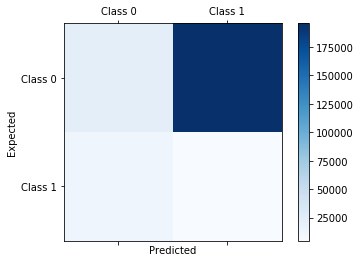

In [17]:
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat , cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Hyper parameters

In [18]:
def autoencoder(dims, act='relu', init='glorot_uniform'):

    n_stacks = len(dims) - 1
    input_img = Input(shape=(dims[0],), name='input')
    x = input_img
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)

    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)  

    x = encoded
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    decoded = x
    return Model(inputs=input_img, outputs=decoded, name='AE'), Model(inputs=input_img, outputs=encoded, name='encoder')


In [19]:
dims = [x_all.shape[-1], 500, 500, 2000, 10]
init = VarianceScaling(scale=1. / 3., mode='fan_in',
                           distribution='uniform')
pretrain_optimizer = SGD(lr=0.1, momentum=0.9)
pretrain_epochs = 100
batch_size = 256
save_dir = r'C:\Users\YALAVI\Anaconda3\Lib\site-packages\statsmodels\tsa\vector_ar\tests\results'

In [20]:
autoencoder, encoder = autoencoder(dims, init=init)

In [21]:
from keras.callbacks import EarlyStopping
usualCallback = EarlyStopping()

overfitCallback = EarlyStopping(monitor='loss', min_delta=0, patience = 20)

### Pre-train autoencoder

In [22]:


autoencoder.compile(optimizer=pretrain_optimizer, loss='mse')
autoencoder.fit(x_all, x_all, batch_size=batch_size, epochs=pretrain_epochs , callbacks=[overfitCallback] ) #, callbacks=cb)
autoencoder.save_weights(save_dir + '/ae_weights.h5')



Epoch 1/100
236280/236280 [==============================] - 268s 1ms/step - loss: 0.7493
Epoch 2/100
236280/236280 [==============================] - 231s 978us/step - loss: 0.4941
Epoch 3/100
236280/236280 [==============================] - 224s 946us/step - loss: 0.4097
Epoch 4/100
236280/236280 [==============================] - 225s 952us/step - loss: 0.3773
Epoch 5/100
236280/236280 [==============================] - 227s 960us/step - loss: 0.3586
Epoch 6/100
236280/236280 [==============================] - 231s 979us/step - loss: 0.3447
Epoch 7/100
236280/236280 [==============================] - 230s 974us/step - loss: 0.3345
Epoch 8/100
236280/236280 [==============================] - 226s 958us/step - loss: 0.3259
Epoch 9/100
236280/236280 [==============================] - 231s 977us/step - loss: 0.3188
Epoch 10/100
236280/236280 [==============================] - 234s 989us/step - loss: 0.3124
Epoch 11/100
236280/236280 [==============================] - 230s 974us/step - l

In [27]:

autoencoder.save_weights(save_dir + '/ae_weights.h5')

 #### Load the pre-trained auto encoder weights

In [28]:
autoencoder.load_weights(save_dir + '/ae_weights.h5')

## Build clustering model

### ClusteringLayer

In [29]:
class ClusteringLayer(Layer):

    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(shape=(self.n_clusters, input_dim), initializer='glorot_uniform', name='clusters')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):

        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) # Make sure each sample's 10 values add up to 1.
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


In [30]:
n_clusters = 2
clustering_layer = ClusteringLayer(n_clusters , name='clustering')(encoder.output)
model = Model(inputs=encoder.input, outputs=clustering_layer)

In [32]:
model.compile(optimizer=SGD(0.01, 0.9), loss='kld')

### Step 1: initialize cluster centers using k-means

In [33]:
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoder.predict(x_all))

In [34]:
y_pred_last = np.copy(y_pred)

In [35]:
model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

### Step 2: deep clustering
Compute p_i by first raising q_i to the second power and then normalizing by frequency per cluster:

In [36]:
def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

In [37]:
loss = 0
index = 0
maxiter = 8000
update_interval = 140
index_array = np.arange(x_all.shape[0])

In [38]:
tol = 0.001 

### Start training

In [39]:
for ite in range(int(maxiter)):
    if ite % update_interval == 0:
        q = model.predict(x_all, verbose=0)
        p = target_distribution(q)  


        y_pred = q.argmax(1)
        if Y_all is not None:
            acc = np.round(metrics.acc(Y_all, y_pred), 5)
            nmi = np.round(metrics.nmi(Y_all, y_pred), 5)
            ari = np.round(metrics.ari(Y_all, y_pred), 5)
            loss = np.round(loss, 5)
            print('Iter %d: acc = %.5f, nmi = %.5f, ari = %.5f' % (ite, acc, nmi, ari), ' ; loss=', loss)


        delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
        y_pred_last = np.copy(y_pred)
        if ite > 0 and delta_label < tol:
            print('delta_label ', delta_label, '< tol ', tol)
            print('Reached tolerance threshold. Stopping training.')
            break
    idx = index_array[index * batch_size: min((index+1) * batch_size, x_all.shape[0])]
    loss = model.train_on_batch(x=x_all[idx], y=p[idx])
    index = index + 1 if (index + 1) * batch_size <= x_all.shape[0] else 0

model.save_weights(save_dir + '/DEC_model_final.h5')

C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 0: acc = 0.82381, nmi = 0.02596, ari = -0.07299  ; loss= 0


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 140: acc = 0.76824, nmi = 0.03298, ari = -0.07652  ; loss= 0.00153


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 280: acc = 0.74434, nmi = 0.03601, ari = -0.07547  ; loss= 0.00352


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 420: acc = 0.73299, nmi = 0.03630, ari = -0.07388  ; loss= 0.00427


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 560: acc = 0.71966, nmi = 0.03574, ari = -0.07116  ; loss= 0.01669


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 700: acc = 0.75596, nmi = 0.02725, ari = -0.07066  ; loss= 0.01424


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 840: acc = 0.72978, nmi = 0.03016, ari = -0.06897  ; loss= 0.02389


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 980: acc = 0.70932, nmi = 0.03265, ari = -0.06697  ; loss= 0.00352


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1120: acc = 0.70525, nmi = 0.03406, ari = -0.06714  ; loss= 0.06829


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1260: acc = 0.68143, nmi = 0.03896, ari = -0.06493  ; loss= 0.00205


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1400: acc = 0.66365, nmi = 0.04150, ari = -0.06193  ; loss= 0.04781


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1540: acc = 0.65645, nmi = 0.04206, ari = -0.06034  ; loss= 0.00376


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1680: acc = 0.68230, nmi = 0.03698, ari = -0.06394  ; loss= 0.03372


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1820: acc = 0.65060, nmi = 0.03903, ari = -0.05713  ; loss= 0.0033


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1960: acc = 0.65095, nmi = 0.03945, ari = -0.05745  ; loss= 0.01267


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 2100: acc = 0.64976, nmi = 0.04043, ari = -0.05768  ; loss= 0.03007


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 2240: acc = 0.64948, nmi = 0.04058, ari = -0.05768  ; loss= 0.01189


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 2380: acc = 0.63063, nmi = 0.04340, ari = -0.05381  ; loss= 0.00296


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 2520: acc = 0.63596, nmi = 0.04316, ari = -0.05522  ; loss= 0.0691


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 2660: acc = 0.62251, nmi = 0.04480, ari = -0.05205  ; loss= 0.05602


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 2800: acc = 0.61837, nmi = 0.04505, ari = -0.05092  ; loss= 0.00427


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 2940: acc = 0.61723, nmi = 0.04538, ari = -0.05072  ; loss= 0.06511


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 3080: acc = 0.61075, nmi = 0.04694, ari = -0.04938  ; loss= 0.00217


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 3220: acc = 0.64118, nmi = 0.04225, ari = -0.05625  ; loss= 0.00186


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 3360: acc = 0.62822, nmi = 0.04341, ari = -0.05311  ; loss= 0.00186


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 3500: acc = 0.62774, nmi = 0.04382, ari = -0.05316  ; loss= 0.00681


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 3640: acc = 0.62434, nmi = 0.04409, ari = -0.05228  ; loss= 0.00271


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 3780: acc = 0.62034, nmi = 0.04465, ari = -0.05133  ; loss= 0.02167


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 3920: acc = 0.62597, nmi = 0.04410, ari = -0.05277  ; loss= 0.00199


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 4060: acc = 0.62070, nmi = 0.04566, ari = -0.05189  ; loss= 0.04458


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 4200: acc = 0.61778, nmi = 0.04397, ari = -0.05025  ; loss= 0.00706


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 4340: acc = 0.61829, nmi = 0.04375, ari = -0.05031  ; loss= 0.04764


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 4480: acc = 0.61581, nmi = 0.04369, ari = -0.04952  ; loss= 0.00196


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 4620: acc = 0.61735, nmi = 0.04178, ari = -0.04909  ; loss= 0.00188


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 4760: acc = 0.61492, nmi = 0.04279, ari = -0.04884  ; loss= 0.00385


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 4900: acc = 0.61163, nmi = 0.04448, ari = -0.04860  ; loss= 0.00957


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 5040: acc = 0.61204, nmi = 0.04463, ari = -0.04879  ; loss= 0.00793


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 5180: acc = 0.61065, nmi = 0.04499, ari = -0.04852  ; loss= 0.00328


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 5320: acc = 0.61096, nmi = 0.04523, ari = -0.04872  ; loss= 0.00185


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 5460: acc = 0.61075, nmi = 0.04594, ari = -0.04896  ; loss= 0.023


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 5600: acc = 0.60840, nmi = 0.04618, ari = -0.04833  ; loss= 0.01078


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 5740: acc = 0.60793, nmi = 0.04620, ari = -0.04819  ; loss= 0.00216


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 5880: acc = 0.60754, nmi = 0.04584, ari = -0.04792  ; loss= 0.01035


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 6020: acc = 0.58826, nmi = 0.03914, ari = -0.03888  ; loss= 0.0641


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 6160: acc = 0.60176, nmi = 0.04515, ari = -0.04580  ; loss= 0.01814


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 6300: acc = 0.59825, nmi = 0.04478, ari = -0.04453  ; loss= 0.00993


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 6440: acc = 0.59385, nmi = 0.04561, ari = -0.04345  ; loss= 0.00187


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 6580: acc = 0.59197, nmi = 0.04662, ari = -0.04324  ; loss= 0.00368


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 6720: acc = 0.58923, nmi = 0.04714, ari = -0.04254  ; loss= 0.00417


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 6860: acc = 0.58479, nmi = 0.04768, ari = -0.04127  ; loss= 0.00185


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 7000: acc = 0.58603, nmi = 0.04723, ari = -0.04152  ; loss= 0.02954


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 7140: acc = 0.58697, nmi = 0.04662, ari = -0.04160  ; loss= 0.00183


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 7280: acc = 0.58622, nmi = 0.04640, ari = -0.04126  ; loss= 0.00602


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 7420: acc = 0.58503, nmi = 0.04688, ari = -0.04105  ; loss= 0.06502


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 7560: acc = 0.57946, nmi = 0.04807, ari = -0.03962  ; loss= 0.00185


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 7700: acc = 0.57605, nmi = 0.04998, ari = -0.03912  ; loss= 0.00427


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 7840: acc = 0.57947, nmi = 0.04936, ari = -0.04008  ; loss= 0.00553


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 7980: acc = 0.57621, nmi = 0.04995, ari = -0.03916  ; loss= 0.01405


### Load the clustering model trained weights

In [40]:
model.load_weights(save_dir + '/DEC_model_final.h5')

### Final Evaluation

In [41]:
q = model.predict(x_all, verbose=0)
p = target_distribution(q)  

y_pred = q.argmax(1)
if Y_all is not None:
    acc = np.round(metrics.acc(Y_all, y_pred), 5)
    nmi = np.round(metrics.nmi(Y_all, y_pred), 5)
    ari = np.round(metrics.ari(Y_all, y_pred), 5)
    loss = np.round(loss, 5)
    print('Acc = %.5f, nmi = %.5f, ari = %.5f' % (acc, nmi, ari), ' ; loss=', loss)

Acc = 0.57594, nmi = 0.04966, ari = -0.03897  ; loss= 0.06222


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


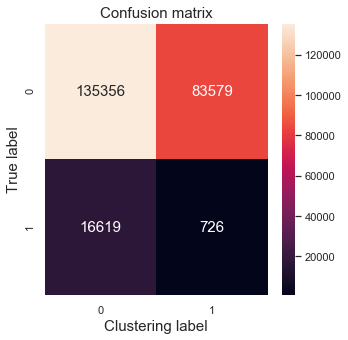

In [42]:
import seaborn as sns
import sklearn.metrics
import matplotlib.pyplot as plt
sns.set(font_scale=1)
confusion_matrix = sklearn.metrics.confusion_matrix(Y_all, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, annot=True, fmt="d", annot_kws={"size": 15});
plt.title("Confusion matrix", fontsize=15)
plt.ylabel('True label', fontsize=15)
plt.xlabel('Clustering label', fontsize=15)
plt.show()